# <div dir="rtl">سوال ششم:</div>

In [1]:
%cd drive/MyDrive/FDM

/content/drive/MyDrive/FDM


In [2]:
!pip install jenkspy

     |████████████████████████████████| 55 kB 2.9 MB/s 
  Created wheel for jenkspy: filename=jenkspy-0.2.0-cp37-cp37m-linux_x86_64.whl size=71227 sha256=90875dd1a1e8a27c8c5cae915de5fc1e708133c32f6161f25b511e37a5e3feaf
  Stored in directory: /root/.cache/pip/wheels/d8/d1/42/9bd05164ef706b84674905892f0542f8db6ac4a652473ca7e0
Successfully built jenkspy


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jenkspy

In [4]:
machine_data = pd.read_csv("machines.csv", index_col=None, header=None).drop(0, axis=1)
machine_data = machine_data.rename(columns={1: '‫‪Vendor_name', 2: 'model', 3: 'MCYT', 4: 'MMIN', 5: 'MMAX', 
                                            6: 'CACH', 7: 'CHMIN', 8: 'CHMAX', 9: 'PRP', 10: 'ERP'})

# <div dir="rtl">قسمت a:</div>

<div dir="rtl">

در این قسمت ستون CACH را با استفاده از روش cut تقسیم بندی میکنیم.

برای اینکار از تابع cut از کتابخانه pandas استفاده میکنیم. به تابع آرگومان سه و نام ستونها را می‌دهیم تا داده ها را تقسیم بندی کند.

این تابع بصورت فاصله مساوی داده ها را به گروه های مختلف تقسیم میکند برای همین نمیتوان انتظار توزیع یکنواخت داده ها بین گروه ها را داشت.

در شکل زیر هیستوگرام داده هایی که با این روش تقسیم بندی شده اند را نشان داده ایم.

<div>

In [5]:
category = pd.cut(machine_data.CACH,bins=3,labels=['C','B', 'A'])
machine_data.insert(machine_data.shape[1]-4,'CACH_cut',category)

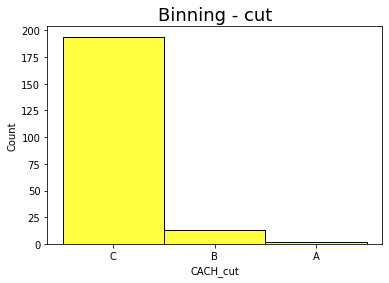

In [6]:
sns.histplot(data=machine_data['CACH_cut'], color='yellow')
plt.title('Binning - cut', fontsize=18)
plt.show()

# <div dir="rtl">قسمت b:</div>

<div dir="rtl">

در این قسمت ستون CACH را با استفاده از روش qcut تقسیم بندی میکنیم.

برای اینکار از تابع qcut از کتابخانه pandas استفاده میکنیم. به تابع آرگومان سه و نام ستونها را می‌دهیم تا داده ها را تقسیم بندی کند.

در این روش داده ها و فاصله بین ها را به گونه ای مشخص میکند تا در حد امکان بینهایی که ایجاد میشود تعداد یکسانی داده در بر داشته باشند. البته اگر بعد از این داده ای به ستون اضافه شود تضمین نمیشود که این توزیع یکنواخت همچنان حذف شود.

در شکل زیر هیستوگرام داده هایی که با این روش تقسیم بندی شده اند را نشان داده ایم و مشخص است که داده ها توزیع یکنواختی در بینها دارند.

<div>

In [7]:
machine_data.insert(machine_data.shape[1]-4,'CACH_qcut',pd.qcut(machine_data['CACH'],3,labels=["A", "B", "C"]))

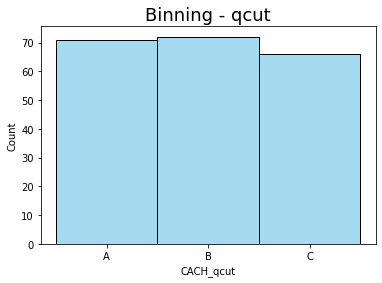

In [8]:
sns.histplot(data=machine_data['CACH_qcut'], color='skyblue')
plt.title('Binning - qcut', fontsize=18)
plt.show()

# <div dir="rtl">قسمت c:</div>

<div dir="rtl">

در این قسمت ستون CACH را با استفاده از روش jenks_breaks تقسیم بندی میکنیم.

برای اینکار از تابع jenks_breaks از کتابخانه jenkspy استفاده میکنیم. به تابع تعداد گروه ها و داده ها را می‌دهیم تا مناسبترین محلها برای شکست را پیدا کند.

در این روش گروه ها به گونه ای ساخته میشوند که اعضای یک گروه به یکدیگر در نزدیکترین حالت را داشته باشند یعنی اعضای یک گروه واریانس کمینه داشته باشند.

در شکل زیر هیستوگرام داده هایی که با این روش تقسیم بندی شده اند را نشان داده ایم.

<div>

In [9]:
natural_breaks = jenkspy.jenks_breaks(machine_data['CACH'], nb_class=3)
category_jenks = pd.cut(machine_data.CACH, bins=natural_breaks, labels=['C','B', 'A'])
machine_data.insert(machine_data.shape[1]-4, 'CACH_jenks', category_jenks)

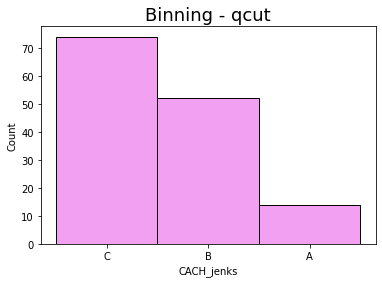

In [10]:
sns.histplot(data=machine_data['CACH_jenks'], color='violet')
plt.title('Binning - qcut', fontsize=18)
plt.show()